In [9]:
import pandas as pd
df = pd.read_csv('D://convertcsv.csv', index_col=False)

In [10]:
print(df)

                            transactionId  accountId    type   amount  \
0    119973fe-7d7b-494b-86cf-872c34b6780c         74   DEBIT    12.90   
1    b7974ee5-6554-4aa4-b714-852d3d96a919         74   DEBIT    24.43   
2    3c7d2213-bd27-4415-900f-e21e5678a616         74   DEBIT    13.95   
3    928acbed-ba64-418c-af34-36e1dffbe281         74   DEBIT    10.32   
4    6b72ab24-2cad-4c9e-a77f-c1c23b8f2588         74   DEBIT    27.47   
5    7f99a759-5b8e-42ab-9c6f-a27e50aa6567         74   DEBIT   200.00   
6    f3a01c47-9512-4a74-929b-dd175a09b2e4         74   DEBIT    28.85   
7    8a06d116-2288-4e85-8c04-b80ebb70e4ff         74   DEBIT    47.41   
8    0dced0f4-6feb-4705-b82e-662d105ce746         74   DEBIT    27.64   
9    0a4725d2-c88a-4bde-8c82-129dba2adef3         74   DEBIT    13.18   
10   ba6deee2-ac8a-4abc-ab03-f7292f47d539         74   DEBIT    24.89   
11   8e1b6bf7-4453-4721-bf14-1f918da91471         74   DEBIT    23.11   
12   e3871c23-c818-438a-9b8b-32a19f1bdcc1         7

In [11]:
print(df.date)

0      2018-01-01T02:00:00.000+0000
1      2018-01-02T13:00:00.000+0000
2      2018-01-02T19:00:00.000+0000
3      2018-01-03T22:00:00.000+0000
4      2018-01-04T19:00:00.000+0000
5      2018-01-04T16:00:00.000+0000
6      2018-01-05T13:00:00.000+0000
7      2018-01-05T06:00:00.000+0000
8      2018-01-07T19:00:00.000+0000
9      2018-01-07T18:00:00.000+0000
10     2018-01-09T19:00:00.000+0000
11     2018-01-10T19:00:00.000+0000
12     2018-01-11T13:00:00.000+0000
13     2018-01-12T13:00:00.000+0000
14     2018-01-12T08:00:00.000+0000
15     2018-01-13T19:00:00.000+0000
16     2018-01-13T22:00:00.000+0000
17     2018-01-14T19:00:00.000+0000
18     2018-01-15T13:00:00.000+0000
19     2018-01-15T17:00:00.000+0000
20     2018-01-16T13:00:00.000+0000
21     2018-01-16T11:00:00.000+0000
22     2018-01-17T06:00:00.000+0000
23     2018-01-20T13:00:00.000+0000
24     2018-01-20T03:00:00.000+0000
25     2018-01-21T19:00:00.000+0000
26     2018-01-22T13:00:00.000+0000
27     2018-01-22T04:00:00.0

In [12]:
bydate = df.groupby('date') 

In [13]:
print(bydate)

In [14]:
print(bydate.first())

                                                     transactionId  accountId  \
date                                                                            
2018-01-01T02:00:00.000+0000  119973fe-7d7b-494b-86cf-872c34b6780c         74   
2018-01-02T13:00:00.000+0000  b7974ee5-6554-4aa4-b714-852d3d96a919         74   
2018-01-02T19:00:00.000+0000  3c7d2213-bd27-4415-900f-e21e5678a616         74   
2018-01-03T22:00:00.000+0000  928acbed-ba64-418c-af34-36e1dffbe281         74   
2018-01-04T16:00:00.000+0000  7f99a759-5b8e-42ab-9c6f-a27e50aa6567         74   
2018-01-04T19:00:00.000+0000  6b72ab24-2cad-4c9e-a77f-c1c23b8f2588         74   
2018-01-05T06:00:00.000+0000  8a06d116-2288-4e85-8c04-b80ebb70e4ff         74   
2018-01-05T13:00:00.000+0000  f3a01c47-9512-4a74-929b-dd175a09b2e4         74   
2018-01-07T18:00:00.000+0000  0a4725d2-c88a-4bde-8c82-129dba2adef3         74   
2018-01-07T19:00:00.000+0000  0dced0f4-6feb-4705-b82e-662d105ce746         74   
2018-01-09T19:00:00.000+0000

In [18]:
from pandas.io.json import json_normalize
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df['amount'] = pd.to_numeric(df['amount'])
sum_df = df.groupby(['year','month']).agg({'amount':'sum'})

In [19]:
print(sum_df)

             amount
year month         
2018 1      4729.50
     2      5012.73
     3      5560.13
     4      5367.24
     5      5665.42
     6      5254.34
     7      4922.00
     8      6011.27
     9      5094.21
     10     5704.60
     11     5019.35
     12     4536.43
2019 1      4733.85


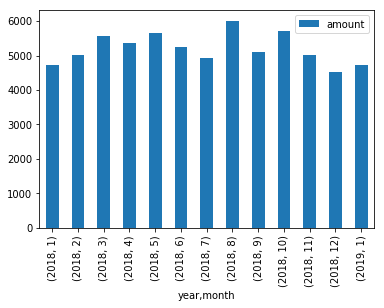

In [21]:
import matplotlib.pyplot as plt
my_plot = sum_df.plot(kind='bar')

In [25]:
bydate = df.groupby('tag').agg({'amount':'sum'})
print(bydate)

             amount
tag                
ATM        12000.00
F&B         7946.73
TRANSFER   44740.91
TRANSPORT   2923.43


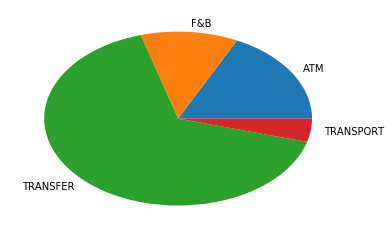

In [28]:
from matplotlib.pyplot import pie, axis, show
pie(bydate['amount'], labels=bydate.index);
show()